In [107]:
from sortedcontainers import SortedList
file = open('input23', 'r')
lines = file.read().splitlines()

In [108]:
class Elf:
    def __init__(self, pos):
        self.pos = pos
        self.proposedPos = None
        
    def adding(self, step):
        return addV(self.pos, step)
        
def addV(a, b):
    return (a[0]+b[0], a[1]+b[1])    

In [109]:
#strat at 21:48
#end at 22:06

In [113]:
elves = []
for y, line in enumerate(lines):
    for x, char in enumerate(line):
        if char == '#':
            elves.append(Elf((x, y)))     

directionIndex = 0
directions = [[(x,-1) for x in [-1,0,1]], 
              [(x, 1) for x in [-1,0,1]], 
              [(-1,y) for y in [-1,0,1]], 
              [( 1,y) for y in [-1,0,1]]]
roundNum = 0
roundValues = []
while True:
    roundNum += 1
    
    #Propose position
    elvesPositions = SortedList()
    elvesPositions.update([elf.pos for elf in elves])
    for elf in elves:  
        nearElvesCount = 0
        elf.proposedPos = None

        for dX in [-1,0,1]:
            for dY in [-1,0,1]:
                if elf.adding((dX,dY)) in elvesPositions:
                    nearElvesCount += 1       

        if nearElvesCount > 1:
            for i in range(4):
                direction = directions[(directionIndex + i) % 4]
                #elf present, go to next direction
                if all([not elf.adding(step) in elvesPositions for step in direction]):    
                    #Propose to move in this direction
                    elf.proposedPos = elf.adding(direction[1])
                    break

    #Move
    elvesProposedPositions = SortedList()    
    elvesProposedPositions.update(filter(lambda pos: pos != None, [elf.proposedPos for elf in elves]))
    movingElves = len(elvesProposedPositions)
    if movingElves == 0:
        break
    
    for elf in elves: 
        if elf.proposedPos == None:
            continue
        elif elvesProposedPositions.count(elf.proposedPos) == 1:
            elf.pos = elf.proposedPos
            #print("Elf moved to " + str(elf.pos))
        #else:
        #    print("Elf did not move to " + str(elf.proposedPos))        
        elf.proposedPos = None    
        
    #Change direction
    directionIndex += 1
    #print("Round " + str(roundNum) + ", moving elves: " + str(movingElves))
    roundValues.append(movingElves)
    
print("Round " + str(roundNum) + ", moving elves: " + str(movingElves))    

elvesXs = [elf.pos[0] for elf in elves]
elvesYs = [elf.pos[1] for elf in elves]
#empty tiles:
(max(elvesXs) - min(elvesXs) + 1) * (max(elvesYs) - min(elvesYs) + 1) - len(elves)

Round 988, moving elves: 0


15797

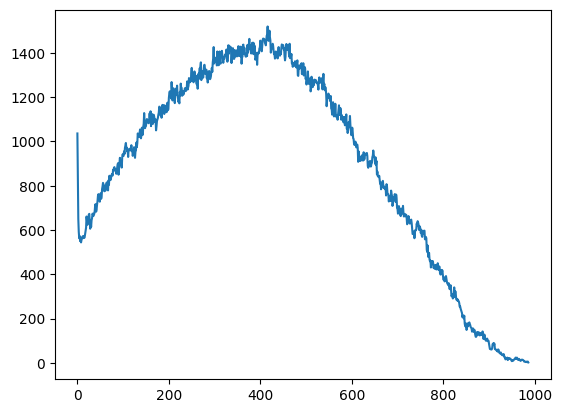

In [112]:
import matplotlib.pyplot as plt
plt.plot(roundValues)
plt.show()